**Цель исследования** - приоритизировать гипотезы по увеличению выручки интернет-магазина, запустить A/B-тест и проанализировать результаты.

**Входные данные** - девять гипотез по увеличению выручки, подготовленные вместе с отделом маркетинга, и результаты по A/B-тесту с данными по заказам, выручке и визитам пользователей.

**Ход исследования**

Перед нами 3 файла: `hypothesis.csv`,`orders.csv` и `visitors.csv`. Информацию по гипотезам и оценкам параметров получим из файла `hypothesis.csv`, о заказах пользователей и выручке из файла `orders.csv` и о визитах пользователей из файла `visitors.csv`. 

О качестве данных ничего не известно. Поэтому перед приоритизацией существующих гипотез и дальнейшим анализом A/B-теста понадобится обзор данных и возможные исправления критических ошибок.

 
Таким образом, исследование пройдет в 4 этапа:
1. [Обзор данных.](#intro) 
   * [Вывод](#intro1)
2. [Предобработка данных.](#intro2)
   * [Вывод](#intro3)
3. [Приоритизация гипотез.](#intro4) 
4. [Анализ A/B-теста.](#intro5)
5. [Общий вывод.](#intro6)

# 1. Обзор данных. <a id='intro'></a>

In [1]:
# импорт библиотеки pandas

import pandas as pd

# импорт библиотеки numpy

import numpy as np

# импорт библиотеки matplotlib

import matplotlib.pyplot as plt

# импорт библиотеки seaborn

import seaborn as sns

# импорт модуля stats из библиотеки scipy

import scipy.stats as stats

# импорт библиотеки datetime

import datetime as dt

# импортирование бибилиотеки os

import os

In [2]:
# установление границы на количество выводимых символов в столбце

pd.options.display.max_colwidth = 210

In [3]:
# чтение данных с файла, сохранение в переменные 

hypothesis_1 = '/datasets/hypothesis.csv'
hypothesis_2 = 'hypothesis.csv'
orders_1 = '/datasets/orders.csv'
orders_2 = 'orders.csv'
visitors_1 = '/datasets/visitors.csv'
visitors_2 = 'visitors.csv'

if os.path.exists(hypothesis_1) or os.path.exists(orders_1) or os.path.exists(visitors_1):
    df_hypothesis = pd.read_csv(hypothesis_1)
    df_orders = pd.read_csv(orders_1)
    df_visitors = pd.read_csv(visitors_1)
elif os.path.exists(hypothesis_2) or os.path.exists(orders_2) or os.path.exists(visitors_2):
    df_hypothesis = pd.read_csv(hypothesis_2)
    df_orders = pd.read_csv(orders_2)
    df_visitors = pd.read_csv(visitors_2)
else:
    print('Something is wrong')

### Таблица df_hypothesis

In [4]:
# просмотр данных в таблице df_hypothesis

df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# получение общей информации о данных в таблице df_hypothesis

df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# получение информации об описательных статистических данных 
# в таблице df_hypothesis

df_hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


### Таблица df_orders

In [7]:
# просмотр первых 10 строк таблицы df_orders

df_orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
# получение общей информации о данных в таблице df_orders

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# получение информации об описательных статистических данных 
# в таблице df_orders

df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


### Таблица df_visitors

In [10]:
# просмотр первых 10 строк таблицы df_visitors

df_visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [11]:
# получение общей информации о данных в таблице df_visitors

df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# получение информации об описательных статистических данных 
# в таблице df_visitors

df_visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Итак, **в таблице `df_hypothesis`** 5 столбцов. У столбцов наблюдается 2 типа данных: `int64` и `object`.

Согласно документации к данным: 
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение Efforts, тем дороже проверка гипотезы).

В данной таблице каких то критических моментов в данных не было обнаружено. Изучим данные этой таблицы более детально на этапе предобработки данных.

**В таблице `df_orders`** 5 столбцов. У столбцов наблюдается 2 типа данных: `int64` и `object`.

Согласно документации к данным: 
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

В столбце `date` необходимо значения перевести в формат даты (datetime), названия столбцов `transactionId` и `visitorId` изменить на `transaction_id` и `visitor_id` и также в столбцах `transactionId` и `visitorId` перевести значения в строковый формат (object).

**В таблице `df_visitors`** 3 столбца. У столбцов наблюдается 2 типа данных: `int64` и `object`.

Согласно документации к данным: 
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

В столбце `date` необходимо значения перевести в формат даты (datetime).

Также, стоит отметить, что во всех таблицах, а именно `df_hypothesis`, `df_orders` и `df_visitors` отсутствуют пропуски в данных.

**Вывод** <a id='intro1'></a>

В таблице `df_hypothesis` представлена информация о гипотезах и оценках по четырём параметрам, в таблице `df_orders` информация о заказах пользователях и выручке, а также группе A/B-теста, в которую попал определённый заказ. В таблице `df_visitors` собрана информация о количестве пользователях по датам и группе A/B-теста, в которую попало определённое количество пользователей.

Для более точного и правильного проведения дальнешего исследования необходимо:

* **в таблице `df_orders`**: в столбце `date` значения перевести в формат даты (datetime), в столбцах `transactionId` и `visitorId` значения перевести в строковый формат (object) и также названия столбцов `transactionId` и `visitorId` изменить на `transaction_id` и `visitor_id`;

* **в таблице `df_visitors`**: в столбце `date` значения перевести в формат даты (datetime).

# 2. Предобработка данных. <a id='intro2'></a>

## Таблица df_hypothesis

In [13]:
# подсчёт явных дубликатов в таблице df_hypothesis

df_hypothesis.duplicated().sum()

0

In [14]:
# просмотр уникальных значений столбца 'Hypothesis'

df_hypothesis['Hypothesis'].unique() 

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [15]:
# просмотр уникальных значений столбца 'Reach'

df_hypothesis['Reach'].unique() 

array([ 3,  2,  8,  5, 10,  1])

In [16]:
# просмотр уникальных значений столбца 'Impact'

df_hypothesis['Impact'].unique() 

array([10,  5,  3,  1,  2,  7,  9])

In [17]:
# просмотр уникальных значений столбца 'Confidence'

df_hypothesis['Confidence'].unique() 

array([8, 4, 7, 3, 1, 2, 9])

In [18]:
# просмотр уникальных значений столбца 'Efforts'

df_hypothesis['Efforts'].unique() 

array([ 6, 10,  3,  8,  1,  5])

После просмотра всех уникальных значений в столбцах можно сделать вывод, что данные в полном порядке, никаких критических ошибок не было обнаружено.

## Таблица df_orders

In [19]:
# подсчёт явных дубликатов в таблице df_orders

df_orders.duplicated().sum()

0

In [20]:
# просмотр уникальных значений столбца 'transactionId'

df_orders['transactionId'].value_counts()

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transactionId, Length: 1197, dtype: int64

In [21]:
# просмотр уникальных значений столбца 'visitorId'

df_orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [22]:
# изменение названия столбцов 'transactionId' и 'visitorId'

df_orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace = True)

In [23]:
# изменение типа данных в столбце 'transaction_id'

df_orders['transaction_id'] = df_orders['transaction_id'].astype('object')

In [24]:
# изменение типа данных в столбце 'visitor_id'

df_orders['visitor_id'] = df_orders['visitor_id'].astype('object')

In [25]:
# просмотр уникальных значений столбца 'date'

df_orders['date'].unique()

array(['2019-08-15', '2019-08-16', '2019-08-01', '2019-08-22',
       '2019-08-17', '2019-08-23', '2019-08-02', '2019-08-18',
       '2019-08-24', '2019-08-03', '2019-08-25', '2019-08-28',
       '2019-08-19', '2019-08-06', '2019-08-26', '2019-08-29',
       '2019-08-04', '2019-08-20', '2019-08-09', '2019-08-07',
       '2019-08-30', '2019-08-05', '2019-08-27', '2019-08-21',
       '2019-08-08', '2019-08-10', '2019-08-31', '2019-08-11',
       '2019-08-12', '2019-08-13', '2019-08-14'], dtype=object)

In [26]:
# изменение типа данных в столбце 'date'

df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [27]:
# просмотр уникальных значений столбца 'revenue'

df_orders['revenue'].value_counts()

990       17
890       13
390       13
1190      10
400       10
          ..
6440       1
45780      1
725        1
9800       1
202740     1
Name: revenue, Length: 713, dtype: int64

In [28]:
# получение информации об описательных статистических данных 
# в столбце 'revenue'

df_orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [29]:
# просмотр уникальных значений столбца 'group'

df_orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Стоит отметить, что по полученным данным мы заметили, что в группе `B` было больше совершено заказов, чем в группе `A`.

Посмотрим,есть ли в столбце `visitor_id` пользователи, которые совершали покупки, как в группе `A`, так и в группе `B`.

In [30]:
# просмотр уникального количества значений (id), которые
# повторяются, как в группе "A", так и в группе "B"

len(np.intersect1d(df_orders.query('group == "A"')['visitor_id'], df_orders.query(
    'group == "B"')['visitor_id'], assume_unique = False))

58

In [31]:
# создание переменной visitor, где
# указаны уникальные id пользователей, как в группе "A", так и в группе "B"

visitor = np.intersect1d(df_orders.query('group == "A"')['visitor_id'], df_orders.query(
    'group == "B"')['visitor_id'], assume_unique = False)
visitor

array([8300375, 199603092, 232979603, 237748145, 276558944, 351125977,
       393266494, 457167155, 471551937, 477780734, 818047933, 963407295,
       1230306981, 1294878855, 1316129916, 1333886533, 1404934699,
       1602967004, 1614305549, 1648269707, 1668030113, 1738359350,
       1801183820, 1959144690, 2038680547, 2044997962, 2378935119,
       2458001652, 2579882178, 2587333274, 2600415354, 2654030115,
       2686716486, 2712142231, 2716752286, 2780786433, 2927087541,
       2949041841, 2954449915, 3062433592, 3202540741, 3234906277,
       3656415546, 3717692402, 3766097110, 3803269165, 3891541246,
       3941795274, 3951559397, 3957174400, 3963646447, 3972127743,
       3984495233, 4069496402, 4120364173, 4186807279, 4256040402,
       4266935830], dtype=object)

In [32]:
# просмотр таблицы 'df_orders'
# с повторяющимися id пользователей

df_orders.query('visitor_id.isin(@visitor)')

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


Таким образом, мы заметили, что есть идентификаторы пользователей в количестве `58` человек, которые совершали заказы, как в группе `A`, так и в группе `B`. Следовательно деление на группы при `A/B-тесте` становится уже не таким точным. 

Так как, в общей совокупности, таких пользователей `181` из `1197`, а это не такое большое количество, значит пока оставим данные id в таблице `orders` и столбце `visitor_id`. 

In [33]:
# сохранение таблицы 'df_orders'
# без id пользователей, которые есть, как в группе "A", так и в группе "B"

#df_orders = (df_orders.query('visitor_id not in @visitor')).reset_index(drop = True)

In [34]:
# просмотр уникального количества значений (id), которые
# повторяются, как в группе "A", так и в группе "B"

#len(np.intersect1d(df_orders.query('group == "A"')['visitor_id'], df_orders.query(
#    'group == "B"')['visitor_id'], assume_unique = False))

In [35]:
# получение общей информации о данных в таблице df_orders

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


In [36]:
# просмотр значений таблицы df_orders

#df_orders

## Таблица df_visitors

In [37]:
# подсчёт явных дубликатов в таблице df_visitors

df_visitors.duplicated().sum()

0

In [38]:
# просмотр уникальных значений столбца 'date'

df_visitors['date'].unique()

array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

In [39]:
# изменение типа данных в столбце 'date'

df_visitors['date'] = df_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [40]:
# просмотр уникальных значений столбца 'group'

df_visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [41]:
# просмотр уникальных значений столбца 'visitors'

df_visitors['visitors'].unique()

array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531])

In [42]:
# получение информации об описательных статистических данных 
# в столбце 'visitors'

df_visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

**Вывод** <a id='intro3'></a>

В процессе предобработки данных мы устранили следующие проблемы:

* **в таблице `df_orders`**: в столбце `date` значения перевели в формат даты (datetime), в столбцах `transactionId` и `visitorId` значения перевели в строковый формат (object) и также названия столбцов `transactionId` и `visitorId` изменили на `transaction_id` и `visitor_id`;

* **в таблице `df_visitors`**: в столбце `date` значения перевели в формат даты (datetime).

Также в процессе предобработки заметили, что у группы `B` - `640` было больше заказов по количеству, чем у группы `A` - `557`.
Далее мы узнали, что что есть идентификаторы пользователей в количестве `58` человек, которые совершали заказы, как в группе `A`, так и в группе `B`. Следовательно деление на группы при `A/B-тесте` становится уже не таким точным. 

Так как, в общей совокупности, таких пользователей `181` из `1197`, а это не такое большое количество, мы **пока оставили данные id в таблице `orders` и столбце `visitor_id`**. 

Далее можно переходить к приоритизации гипотез и непосредственному анализу результатов `A/B-теста`.

# 3.Приоритизация гипотез. <a id='intro4'></a>

На данном этапе нам необходимо:

* Применить фреймворки ICE и RICE для приоритизации гипотез и указать, как изменилась приоритизация гипотез при применении RICE вместо ICE и по каким причинам.

In [43]:
# применение фреймворка и создание столбца 'ICE'

df_hypothesis['ICE'] = round((df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts'],2)

In [44]:
# просмотр отсортированных гипотез по убыванию по фреймворку 'ICE'

df_hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [45]:
# просмотр гипотез и параметров по фреймворку 'ICE'

df_hypothesis[['Hypothesis', 'Impact', 'Confidence', 'Efforts', 'ICE']].sort_values(by = 'ICE', ascending = False).reset_index(
    drop = True)

,Hypothesis,Impact,Confidence,Efforts,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.00


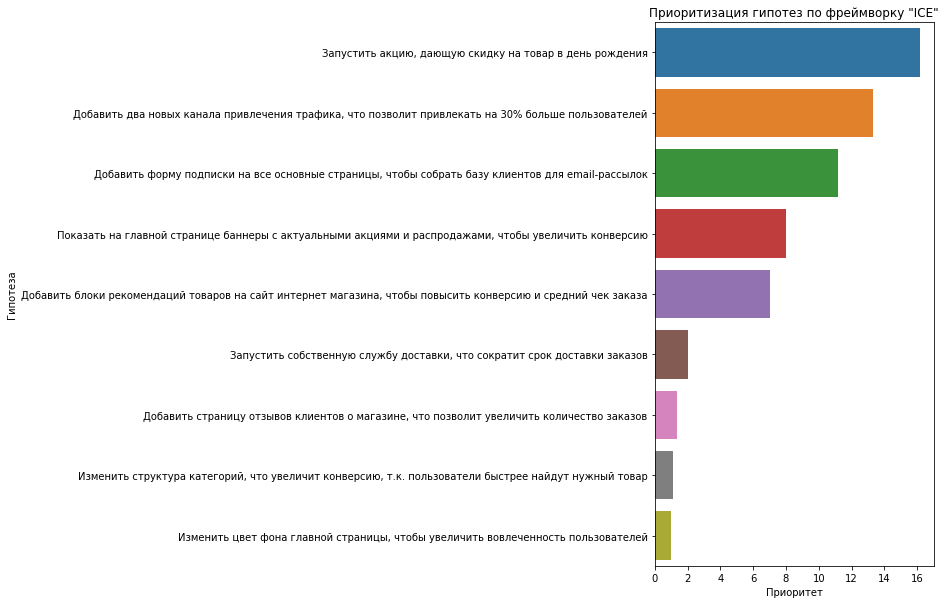

In [46]:
# построение столбчатой диаграммы для
# столбцов 'ICE' и 'Hypothesis'

plt.figure(figsize = (5, 10))
    
sns.barplot(x = 'ICE', y = 'Hypothesis', data = df_hypothesis.sort_values(by = 'ICE', ascending = False)) 
plt.ylabel('Гипотеза')
plt.xlabel('Приоритет')
plt.title('Приоритизация гипотез по фреймворку "ICE"')
plt.show()

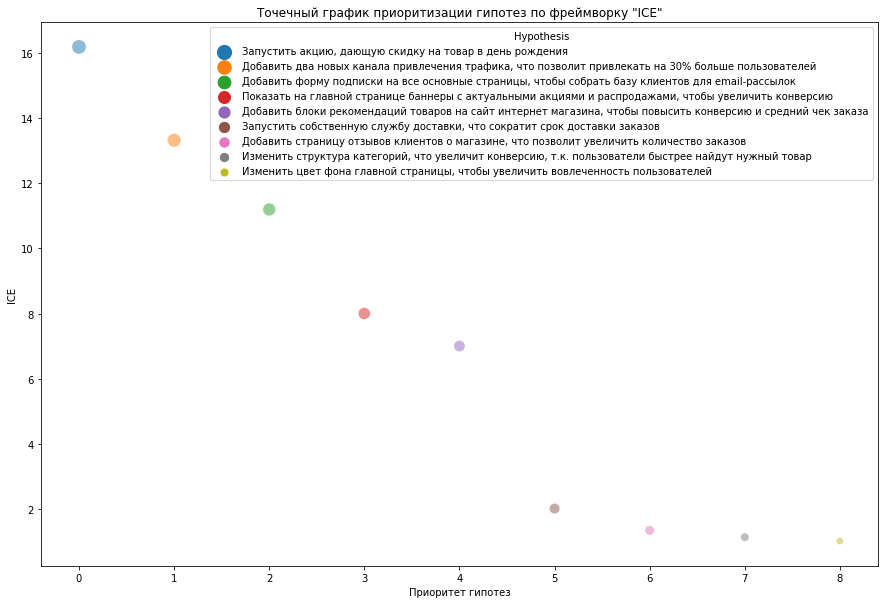

In [47]:
# построение точечной диаграммы

plt.figure(figsize = (15, 10))

x_values = pd.Series(range(0, len(df_hypothesis.sort_values(by = 'ICE', ascending = False).reset_index(drop = True))))
sns.scatterplot(
    data = df_hypothesis.sort_values(by = 'ICE', ascending = False).reset_index(
    drop = True), x = x_values, y = 'ICE', alpha = 0.5, hue = 'Hypothesis', size = 'Hypothesis', sizes = (50,200))
plt.title('Точечный график приоритизации гипотез по фреймворку "ICE"')
plt.xlabel('Приоритет гипотез')
plt.ylabel('ICE')
plt.show()

In [48]:
# применение фреймворка и создание столбца 'RICE'

df_hypothesis['RICE'] = round((
    df_hypothesis['Reach'] * df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts'],2)

In [49]:
# просмотр отсортированных гипотез по убыванию по фреймворку 'RICE'

df_hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [50]:
# просмотр гипотез и параметров по фреймворку 'RICE'

df_hypothesis[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts', 'RICE']].sort_values(
    by = 'RICE', ascending = False).reset_index(drop = True)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


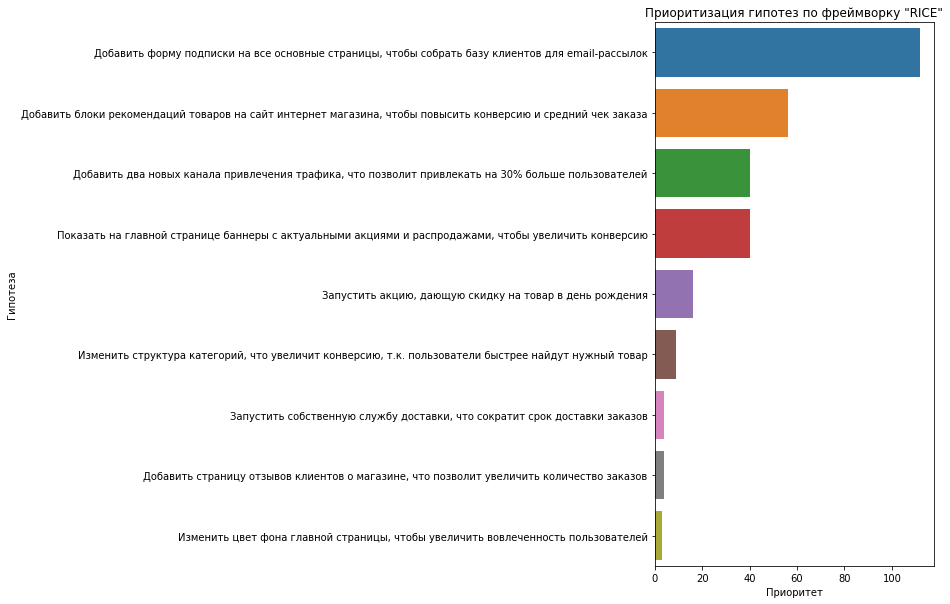

In [51]:
# построение столбчатой диаграммы для
# столбцов 'RICE' и 'Hypothesis'

plt.figure(figsize = (5, 10))
    
sns.barplot(x = 'RICE', y = 'Hypothesis', data = df_hypothesis.sort_values(by = 'RICE', ascending = False)) 
plt.ylabel('Гипотеза')
plt.xlabel('Приоритет')
plt.title('Приоритизация гипотез по фреймворку "RICE"')
plt.show()

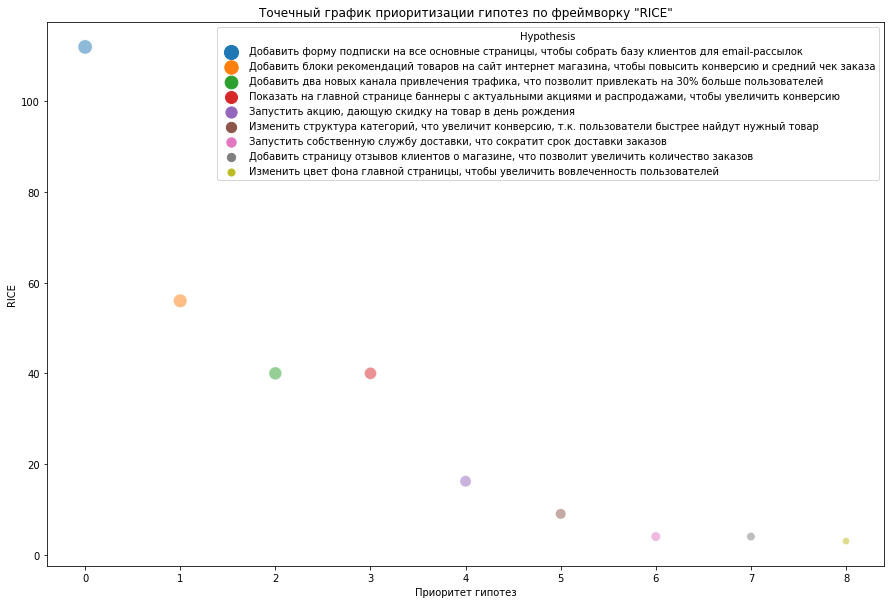

In [52]:
# построение точечной диаграммы

plt.figure(figsize = (15, 10))

x_values = pd.Series(range(0, len(df_hypothesis.sort_values(by = 'RICE', ascending = False).reset_index(drop = True))))
sns.scatterplot(
    data = df_hypothesis.sort_values(by = 'RICE', ascending = False).reset_index(
    drop = True), x = x_values, y = 'RICE', alpha = 0.5, hue = 'Hypothesis', size = 'Hypothesis', sizes = (50,200))
plt.title('Точечный график приоритизации гипотез по фреймворку "RICE"')
plt.xlabel('Приоритет гипотез')
plt.ylabel('RICE')
plt.show()

In [53]:
# просмотр значений для приоритизации гипотез
# по фреймворкам 'ICE' и 'RICE'

df_hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(
    by = 'RICE', ascending = False).style.background_gradient(cmap = 'Blues').set_precision(2) 

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


Как мы видим, по результатам применения фреймворков `ICE` и `RICE`, приоритизация гипотез изменилась довольно существенно. По фреймворку `ICE` на первом месте гипотеза с формулировкой `Запустить акцию, дающую скидку на товар в день рождения`, а по фреймворку `RICE` уже на первом месте совершенно другая гипотеза со следующей формулировкой `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. Первая гипотеза по фреймворку `ICE` находится только на `5-ом месте`.

Такие изменения произошли, потому что во фреймворк `RICE` включён еще параметр `Reach — охват пользователей`. В связи с этим в приоритизации гипотез произошли изменения. 

Например, у гипотезы с формулировкой `Запустить акцию, дающую скидку на товар в день рождения` довольно небольшой охват пользователей, касающийся непосредственно именинников, что не скажешь по поводу гипотезы с формулировкой `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`, где охват пользователей более масштабный.

**Краткое описание фреймворков:**

1. Фреймворк `ICE` рассчитывается по формуле `(Impact * Confidence) / Efforts`, где:

* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение Efforts, тем дороже проверка гипотезы).

2. Фреймворк `RICE` рассчитывается по формуле `(Reach * Impact * Confidence) / Efforts`, где:

* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение Efforts, тем дороже проверка гипотезы).

# 4. Анализ A/B-теста. <a id='intro5'></a>

### Кумулятивные метрики.

Для начала построим графики кумулятивной выручки, среднего чека и конверсии по группам. Далее построим график относительного изменения кумулятивного среднего чека группы B к группе A и график относительного изменения кумулятивной конверсии группы B к группе A. 

In [54]:
# создание таблицы datesGroups 
# с уникальными парами значений 'date' и 'group'
# таблицы df_orders и удаление дубликатов

datesGroups = df_orders[['date', 'group']].drop_duplicates()

# объявление переменной ordersAggregated, где
# указаны кумулятивные значения по заказам

ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}
    ), axis = 1).sort_values(by = ['date', 'group'])

# объявление переменной visitorsAggregated, где
# указаны кумулятивные значения по посещениям

visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
    ), axis = 1).sort_values(by = ['date', 'group'])

# объединение переменных ordersAggregated и visitorsAggregated и 
# создание переменной cumulativeDate

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])

# изменение названий столбцов в таблице cumulativeData

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [55]:
# получение общей информации о данных в таблице cumulativeData

cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


In [56]:
# создание переменных cumulativeRevenueA и cumulativeRevenueB, в которых 
# указана информация о датах, выручке и числе заказов в группах A и B

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

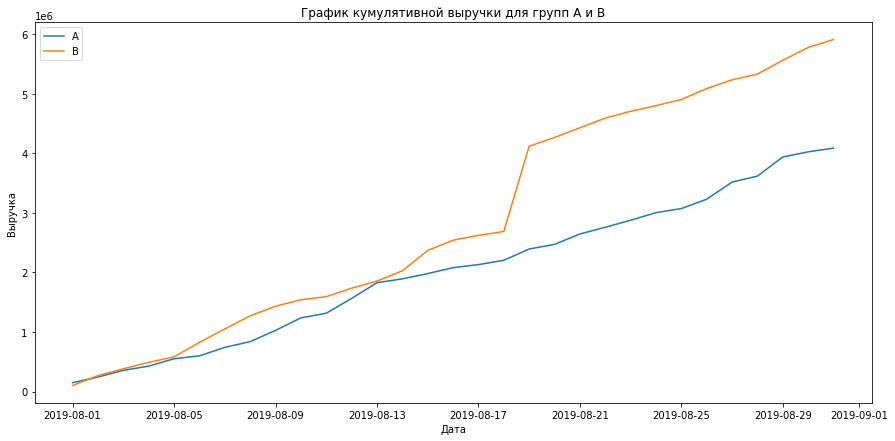

In [57]:
# построение графиков кумулятивной выручки по группам

plt.figure(figsize = (15, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки для групп A и B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

По графику мы видим, что по группе `B` выручка больше на протяжении практически всего периода, чем по группе `A`. Однако, по группе `A` можно заметить, что рост выручки по показателям более плавный, что не скажешь о росте выручки по группе `B`, самый резкий подъём был, начиная с `18 августа` и примерно до `19 августа`. Скорее всего, в эти дни было большое количество заказов или были сделаны самые крупные покупки.

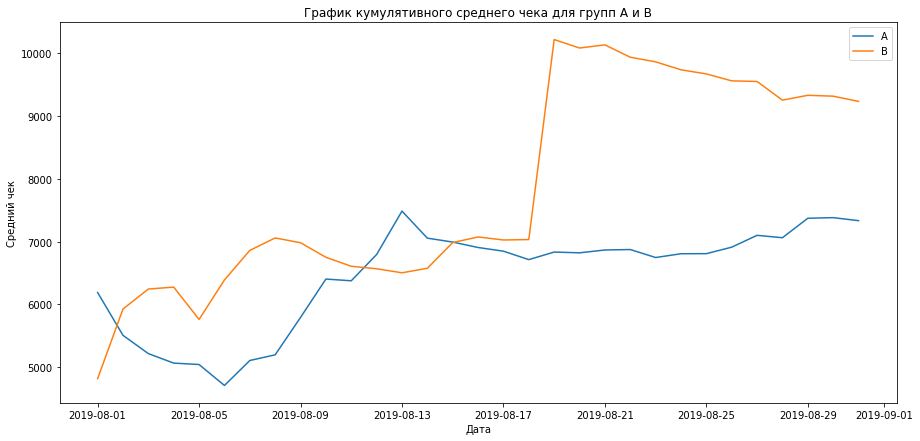

In [58]:
# построение графиков кумулятивного среднего чека по группам

plt.figure(figsize = (15, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'] , label = 'B')
plt.legend()
plt.title('График кумулятивного среднего чека для групп A и B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

На данном графике мы также видим, что средний чек по группе `B` больше, чем по группе `A`. Однако, стоит также отметить, что, как и с результатами выручки, начиная с `18 августа` и до `19 августа` происходит резкий скачок суммы среднего чека. Возможно, здесь также было совершено большое количество заказов или были сделаны крупные покупки, а значит мы можем иметь дело с аномальными значениями в данных.

Также, начиная с `19 августа` средний чек по группе `A` начинает более плавно увеличиваться, что не скажешь по поводу группы `B`, где значения постепенно идут на убыль. Однако, значения среднего чека намного больше по группе `B`.

In [59]:
# создание таблицы mergedCumulativeRevenue, где 
# указана нформация о датах, выручке и числе заказов по обеим группам

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


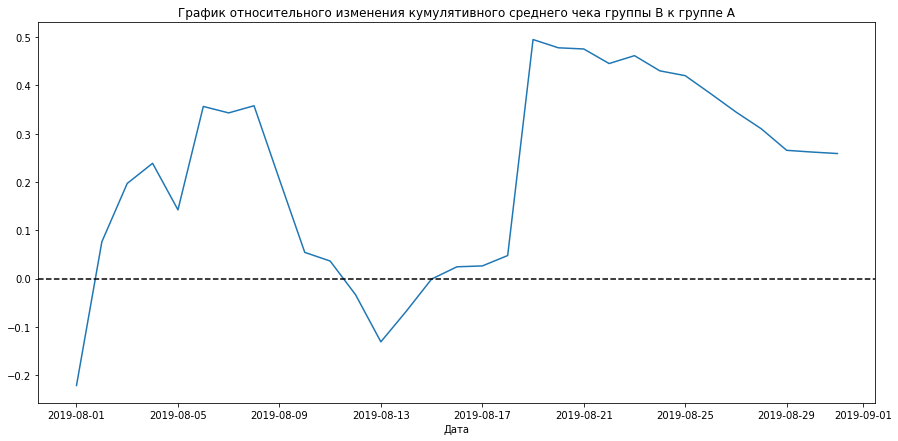

In [60]:
# построение графика относительного изменения 
# кумулятивного среднего чека группы B к группе A

plt.figure(figsize = (15, 7))

plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (
    mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y = 0, color = 'black', linestyle= '--')         
plt.show()

По графику относительного изменения кумулятивного среднего чека мы также видим, что в период с `18 по 19 августа` происходит резкий подъём суммы среднего чека по группе `B`, далее значения постепенно снижаются. 

Однако, также стоит заметить, что с `12 по 15 августа` средний чек по группе `B` намного ниже показателей по группе `A`.

In [61]:
# создание столбца 'conversion'
# в таблице cumulativeData, где
# указано отношение числа заказов к количеству пользователей 
# в указанной группе в указанный день

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# создание переменных cumulativeDataA и cumulativeDataB, в которых 
# указаны данные о заказах в сегментах A и B

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [62]:
# просмотр первых 5 значений таблицы cumulativeDataA

cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [63]:
# просмотр первых 5 значений таблицы cumulativeDataB

cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


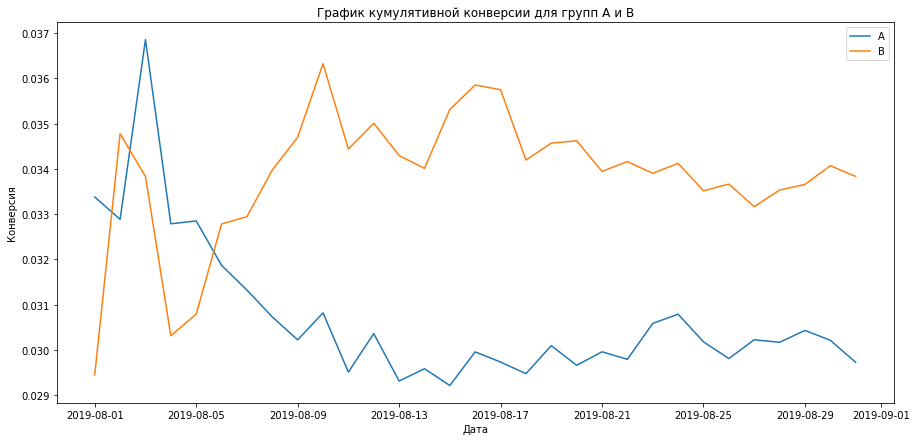

In [64]:
# построение графиков кумулятивной конверсии по группам

plt.figure(figsize = (15, 7))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.title('График кумулятивной конверсии для групп A и B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

По графику мы видим, что начиная с `6 августа` график постепенно стабилизировался и можно сделать вывод, что конверсия по группе `B` намного больше, чем конверсия по группе `A`.

Также, на данном графике мы не видим резкого подъёма значений с `18 по 19 августа`, значит, скорее всего, дело тут не в большом количестве заказов, а в крупной стоимости покупок. 

Посмотрим на период с `18 по 19 августа`, какие заказы по стоимости были совершены в данный отрезок времени.

In [65]:
# просмотр значений по выручке из таблицы cumulativeRevenueB
# в промежутке с 17 августа по 1 сентября в группе 'B'

cumulativeRevenueB.query('date >= "2019-08-17" and date <= "2019-09-01"')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437
43,2019-08-22,4589247,462
45,2019-08-23,4703216,477
47,2019-08-24,4798722,493
49,2019-08-25,4901584,507
51,2019-08-26,5084583,532


In [66]:
# просмотр медианных значений по выручке из таблицы df_orders
# в промежутке с 17 по 21 августа в группе 'B'

df_orders.query('date >= "2019-08-17" and date <= "2019-08-21" and group == "B"').groupby('date')['revenue'].median()

date
2019-08-17    6090
2019-08-18    3190
2019-08-19    2500
2019-08-20    2720
2019-08-21    9809
Name: revenue, dtype: int64

In [67]:
# просмотр средних значений по выручке из таблицы df_orders
# в промежутке с 17 по 21 августа в группе 'B'

df_orders.query('date >= "2019-08-17" and date <= "2019-08-21" and group == "B"').groupby('date')['revenue'].mean().round(2)

date
2019-08-17     5796.79
2019-08-18     7314.56
2019-08-19    68091.43
2019-08-20     7363.70
2019-08-21    11648.36
Name: revenue, dtype: float64

In [68]:
# просмотр отсортированных по убыванию значений по выручке 
# из таблицы df_orders 18 августа в группе 'B'

df_orders.query('date == "2019-08-18" and group == "B"').sort_values(by = 'revenue', ascending = False).head(10)

,transaction_id,visitor_id,date,revenue,group
267,131747281,2579882178,2019-08-18,19538,B
266,2012012971,1516351054,2019-08-18,14400,B
263,2575861846,4256040402,2019-08-18,10970,B
268,3897826085,3927376365,2019-08-18,10450,B
251,2765625299,1967247027,2019-08-18,3190,B
228,691299586,392419518,2019-08-18,2955,B
238,460968028,3508047169,2019-08-18,2938,B
283,3641100475,1579036099,2019-08-18,1100,B
270,1731627062,1100237501,2019-08-18,290,B


In [69]:
# просмотр отсортированных по убыванию значений по выручке 
# из таблицы df_orders 19 августа в группе 'B'

df_orders.query('date == "2019-08-19" and group == "B"').sort_values(by = 'revenue', ascending = False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B
423,4161654914,990904712,2019-08-19,11249,B
523,1739748874,522292794,2019-08-19,4880,B
367,1033377712,3860669668,2019-08-19,3990,B
529,90109939,2075769885,2019-08-19,3525,B
426,19467429,2397843657,2019-08-19,2630,B


Как мы и предполагали тут дело вовсе не в количестве заказов, а именно в крупной стоимости совершенного заказа. Данный заказ был совершен `19 августа` на сумму `1294500`.

Стоит заметить, что с каждым днем количество заказов увеличивалось и самая большая общая выручка была `31 августа` по сумме в `5907760`. Соответственно даже с одним крупным заказом общая сумма выручки `19 августа` намного меньше показателя выручки, которая была `31 августа` по большему количеству заказов. 

Также, медианное значение выручки `19 августа` даже меньше, чем в остальные дни, в промежутке с `17 по 21 августа`, однако среднее значение наоборот самое высокое - `68091.43`, видимо, заказ с большой суммой сказался на показателе среднего значения.

In [70]:
# создание таблицы mergedCumulativeConversions, где 
# указана информация о датах и конверсии по обеим группам

mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


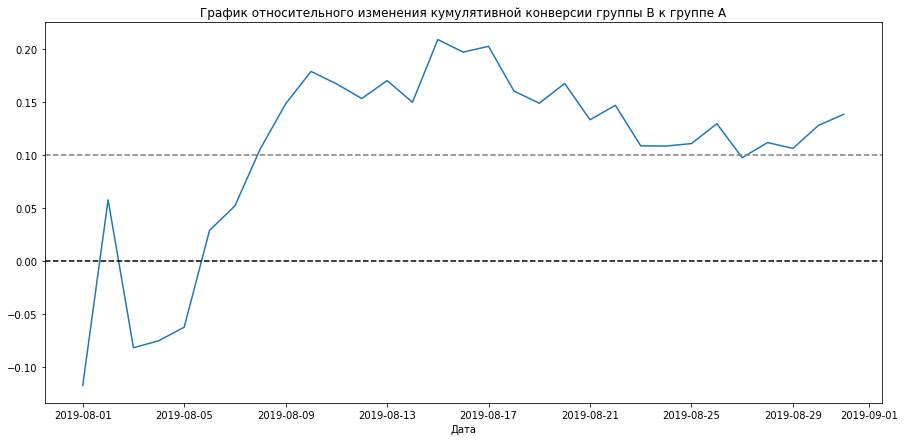

In [71]:
# построение графика относительного изменения 
# кумулятивной конверсии группы B к группе A

plt.figure(figsize = (15, 7))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y = 0, color = 'black', linestyle= '--')  
plt.axhline(y = 0.1, color = 'grey', linestyle= '--') 
#plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5])
plt.show()

По данному графику мы видим, что, начиная где то с `6 августа` показатели конверсии по группе `B` выше показателей конверсии по группе `A`, а с `8 августа` показатели выше на `10% - 20%`.

### Анализ выбросов и всплесков.

На данном этапе нам необходимо построить точечный график количества заказов по пользователям и точечный грфаик стоимостей заказов. Далее посчитать 95-й и 99-й перцентили количества заказов на пользователя и также перцентили стоимости заказов, выбрать границу для определения аномальных заказов.

In [72]:
# создание таблицы ordersByUsers, где
# указано количество заказов по пользователям и 
# переименование столбцов

ordersByUsers = df_orders.groupby('visitor_id', as_index = False).agg({'transaction_id' : 'nunique'})

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by = 'orders', ascending = False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


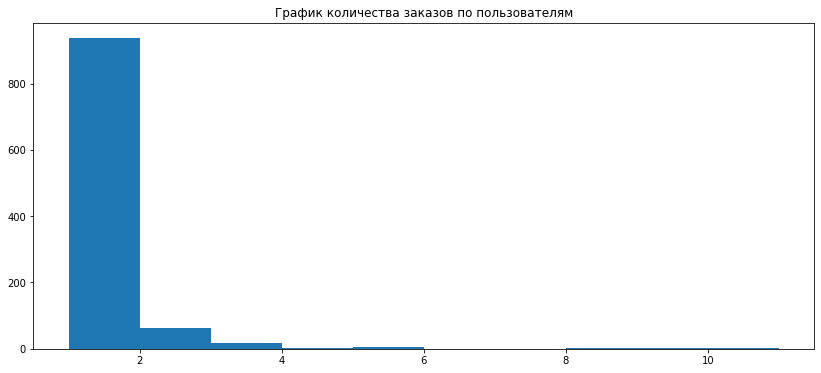

In [73]:
# построение гистограммы распределения

plt.figure(figsize = (14, 6))

plt.hist(ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.show()

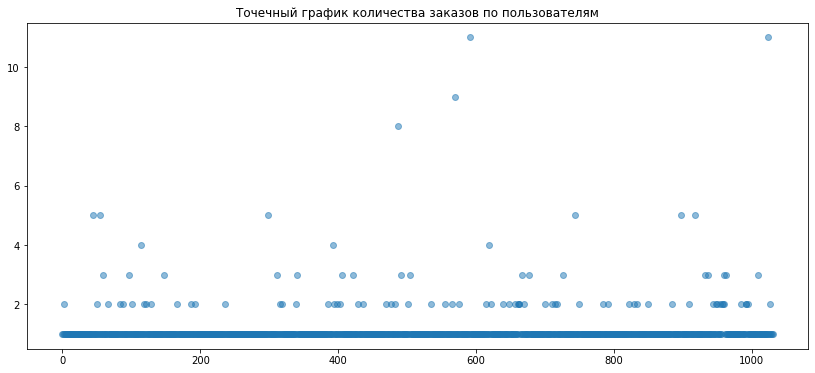

In [74]:
# построение точечной диаграммы 

plt.figure(figsize = (14, 6))

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.show()

По таблице и по графику мы видим, что `11 заказов` это самое максимальное значение и данное количество заказов совершило только два пользователя. 

Больше всего заказов, совершенных `не более 2 раз`.

In [75]:
# подсчёт выборочных перцентилей

np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

По результатам мы видим, что только `1%` пользоватей делают `больше четырёх заказов`. Следовательно 99 перцентиль можно определить, как границу для определения аномального количества заказов на пользователя.

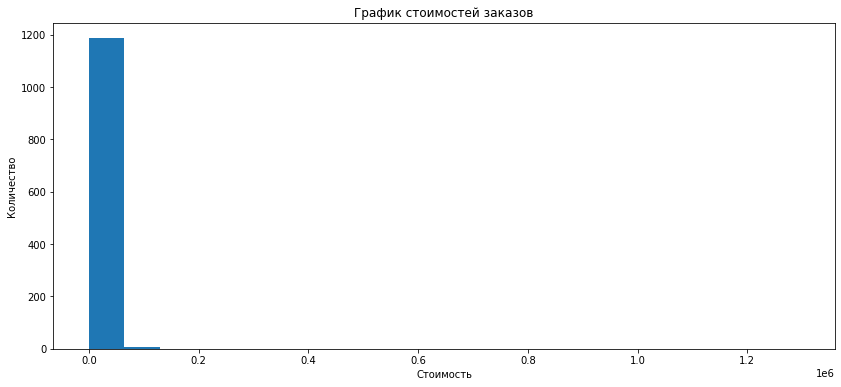

In [76]:
# построение гистограммы распределения

plt.figure(figsize = (14, 6))

plt.hist(df_orders['revenue'], bins = 20)
plt.title('График стоимостей заказов')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

In [77]:
# просмотр первых 10 отсортированных значений по убыванию столбца 'revenue'

df_orders['revenue'].sort_values(ascending = False).head(10)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
682       78990
662       78990
743       67990
1103      66350
1099      65710
Name: revenue, dtype: int64

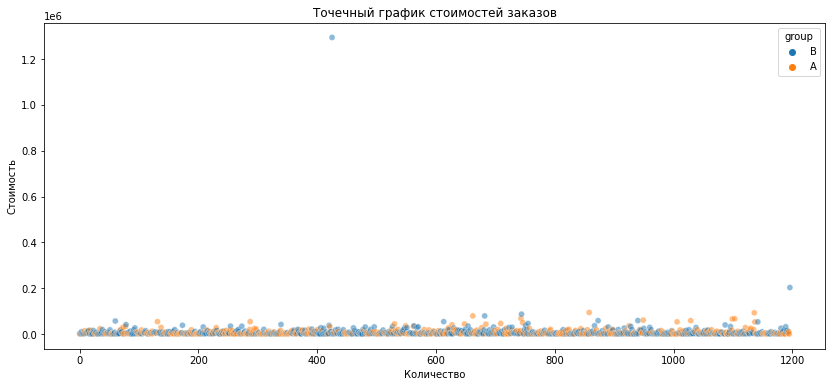

In [78]:
# построение точечной диаграммы 

plt.figure(figsize = (14, 6))

x_values = pd.Series(range(0, len(df_orders)))
sns.scatterplot(data = df_orders, x = x_values, y = 'revenue', alpha = 0.5, hue = 'group')
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество')
plt.ylabel('Стоимость')
plt.show()

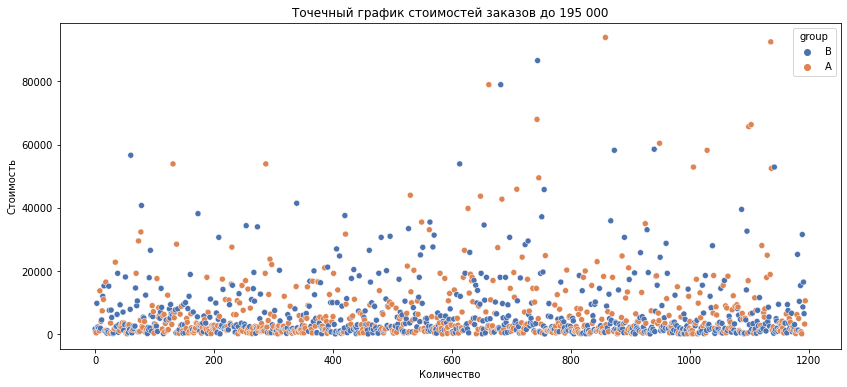

In [79]:
# построение точечной диаграммы 

plt.figure(figsize = (14, 6))

x_values = pd.Series(range(0, len(df_orders.query('revenue <= 195000'))))
#plt.scatter(x_values, df_orders[df_orders['revenue'] <= 195000]['revenue'], alpha = 0.5)
sns.scatterplot(
    data = df_orders, x = x_values, y = df_orders[df_orders['revenue'] <= 195000]['revenue'], hue = 'group', palette = 'deep')
plt.title('Точечный график стоимостей заказов до 195 000')
plt.xlabel('Количество')
plt.ylabel('Стоимость')
plt.show()

In [80]:
# получение среза данных по таблице df_orders

df_orders.query('revenue <= 1500000 and revenue >= 195000')

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Самые большие заказы были сделаны `15 августа` с выручкой на сумму `202740` и `19 августа` на сумму `1294500` в группе `B`.

In [81]:
# подсчёт выборочных перцентилей

np.percentile(df_orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более `1 %` заказов имеют выручку выше `58233.2`. Следовательно 99 перцентиль можно определить, как границу для определения аномальных заказов.

### Статистическая значимость.

На данном этапе нам необходимо:

* посчитать статистическую значимость различий в конверсии между группами по «сырым» данным и далее по «очищенным» данным;


* посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и также по «очищенным» данным.

In [82]:
# подсчёт необходимых значений

visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis = 1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (df_orders[df_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis = 1).sort_values(by = ['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (df_orders[df_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis = 1).sort_values(by = ['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [83]:
# объединение ранее созданных переменных в единую таблицу data
# и просмотр первых 5 значений

data = (ordersADaily.merge(
    ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
       )
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [84]:
# создание переменных ordersByUsersA и ordersByUsersB, где
# указано уникальное количество сделанных заказов по покупателям

ordersByUsersA = (df_orders[df_orders['group'] == 'A'].groupby(
    'visitor_id', as_index = False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (df_orders[df_orders['group'] == 'B'].groupby(
    'visitor_id', as_index = False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['user_id', 'orders']

In [85]:
# просмотр первых 5 значений таблицы ordersByUsersA

ordersByUsersA.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [86]:
# просмотр первых 5 значений таблицы ordersByUsersB

ordersByUsersB.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [87]:
# создание переменных sampleA и sampleB, в которых 
# пользователям с заказами соответствует число заказов пользователя, а 
# пользователям без заказов — нули

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [88]:
# просмотр значений переменной sampleA

sampleA 

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [89]:
# просмотр значений переменной sampleB

sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [90]:
# подсчёт статистической значимости различий в конверсии между группами (с помощью теста Манна-Уитни) и
# получение относительного различия по сырым данным

print('H0: Cтатистически значимых различий в конверсии между группами нет.')
print('H1: Существуют статистически значимые различия в конверсии между группами.')

print('alpha = 0.5')
print('p_value = {:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие между группами B и A : {:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

H0: Cтатистически значимых различий в конверсии между группами нет.
H1: Существуют статистически значимые различия в конверсии между группами.
alpha = 0.5
p_value = 0.017
Относительное различие между группами B и A : 0.138


По результату мы видим, что `значение p_value меньше 0.5`, следовательно отвергнута нулевая гипотеза, которая гласит, что статистически значимых различий в конверсии между группами нет. 
Это означает, `по сырым данным` у нас есть основание утверждать, что существует различие в конверсии между группами `A` и `B`. А относительное преимущество группы `B` над группой `A` в показателях конверсии составляет - `0.138`.

In [91]:
# подсчёт статистической значимости различий в среднем чеке заказа между группами (с помощью теста Манна-Уитни) и
# получение относительного различия по сырым данным

print('H0: Cтатистически значимых различий в среднем чеке заказа между группами нет.')
print('H1: Существуют статистически значимые различия в среднем чеке заказа между группами.')

print('alpha = 0.5')
print('p_value = {:.3f}'.format(stats.mannwhitneyu(
    df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'])[1]))
print('Относительное различие между группами B и A : {:.3f}'.format(
    df_orders[df_orders['group'] == 'B']['revenue'].mean() / df_orders[df_orders['group'] == 'A']['revenue'].mean() - 1))

H0: Cтатистически значимых различий в среднем чеке заказа между группами нет.
H1: Существуют статистически значимые различия в среднем чеке заказа между группами.
alpha = 0.5
p_value = 0.729
Относительное различие между группами B и A : 0.259


По результату мы видим, что `значение p_value больше 0.5`, следовательно нет причин отвергать нулевую гипотезу, которая гласит, что статистически значимых различий в среднем чеке заказа между группами нет. 
Это означает, `по сырым данным` у нас нет оснований утверждать, что существует различие в среднем чеке заказа между группами `A` и `B`. Однако, относительное преимущество группы `B` над группой `A` в показателях среднего чека заказа составляет - `0.259`.

In [92]:
# создание переменных usersWithManyOrders и usersWithExpensiveOrders, где
# находятся данные с аномальными значений

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(ordersByUsers['orders'], 99)]['user_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(
                                     ordersByUsers['orders'], 99)]['user_id']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] >= np.percentile(df_orders['revenue'], 99)]['visitor_id']

In [93]:
# просмотр значений переменной usersWithManyOrders

usersWithManyOrders

18      199603092
23      237748145
227    2038680547
269    2378935119
278    2458001652
499    4256040402
326    2378935119
340    2458001652
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: user_id, dtype: int64

In [94]:
# просмотр значений переменной usersWithExpensiveOrders

usersWithExpensiveOrders

425     1920142716
662     4266935830
682     4266935830
743     4133034833
744      888512513
858     1316129916
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitor_id, dtype: object

In [95]:
# создание переменной abnormalUsers, где
# находятся объединённые данные из переменных
# usersWithManyOrders и usersWithExpensiveOrders

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

abnormalUsers.head()

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: object

In [96]:
# создание переменных sampleAFiltered и sampleBFiltered, в которых 
# находятся данные, очищенные от аномальных

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'], pd.Series(
        0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'], pd.Series(
        0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [97]:
# подсчёт статистической значимости различий в конверсии между группами (с помощью теста Манна-Уитни) и
# получение относительного различия по очищенным данным

print('H0: Cтатистически значимых различий в конверсии между группами нет.')
print('H1: Существуют статистически значимые различия в конверсии между группами.')

print('alpha = 0.5')
print('p_value = {:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие между группами B и A : {:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

H0: Cтатистически значимых различий в конверсии между группами нет.
H1: Существуют статистически значимые различия в конверсии между группами.
alpha = 0.5
p_value = 0.014
Относительное различие между группами B и A : 0.151


По результату мы видим, что `значение p_value меньше 0.5`, как и по сырым данным, следовательно отвергаем нулевую гипотезу, которая гласит, что статистически значимых различий в конверсии между группами нет. 
Это означает, `по очищенным данным` у нас есть основания утверждать, что существует различие в конверсии между группами `A` и `B`. А относительное преимущество группы `B` над группой `A` в показателях конверсии составляет - `0.151`, даже больше, чем по сырым данным, где результат был `0.138`.

In [98]:
# подсчёт статистической значимости различий в среднем чеке заказа между группами (с помощью теста Манна-Уитни) и
# получение относительного различия по очищенным данным

print('H0: Cтатистически значимых различий в среднем чеке заказа между группами нет.')
print('H1: Существуют статистически значимые различия в среднем чеке заказа между группами.')

print('alpha = 0.5')
print('p_value = {:.3f}'.format(
    stats.mannwhitneyu(df_orders[np.logical_and(
        df_orders['group'] == 'A', np.logical_not(df_orders['visitor_id'].isin(abnormalUsers)))]['revenue'], 
                       df_orders[np.logical_and(df_orders['group'] == 'B', np.logical_not(
                           df_orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительное различие между группами B и A : {:.3f}'.format(
    df_orders[np.logical_and(df_orders['group'] == 'B', np.logical_not(
        df_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() / df_orders[np.logical_and(
        df_orders['group'] == 'A', np.logical_not(df_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

H0: Cтатистически значимых различий в среднем чеке заказа между группами нет.
H1: Существуют статистически значимые различия в среднем чеке заказа между группами.
alpha = 0.5
p_value = 0.959
Относительное различие между группами B и A : -0.014


По результату мы видим, что `значение p_value стало еще больше 0.5`, чем при результате по сырым данным, следовательно нет причин отвергать нулевую гипотезу, которая гласит, что статистически значимых различий в среднем чеке заказа между группами нет. 
Это означает,`по очищенным данным` у нас нет оснований утверждать, что существует различие в среднем чеке заказа между группами `A` и `B`. 

Однако, относительное преимущество группы `B` над группой `A` в показателях среднего чека заказа изменилось по сравнению с сырыми данными и составляет - `-0.014`. Это значит, что средний чек группы `B` оказался ниже среднего чека группы `A` на `1,4%`. Видимо, удаление аномальных значений в группе `B` с суммами `202740` и `1294500` внесло свои коррективы.

**Решение по результатам теста и всего проведённого анализа:**

Так как мы выявили, что:

* По `сырым данным` и по `очищенным данным` у нас есть основания утверждать, что существуют различия в конверсии между группами `A` и `B`. По `сырым данным` относительное преимущество группы `B` над группой `A` в показателях конверсии составляет - `13,8%`, а по `очищенным данным` - `15,1%`.


* По `сырым данным` и по `очищенным данным` у нас нет оснований утверждать, что существуют значимые различия в среднем чеке заказа между группами `A` и `B`.
Однако, по `сырым данным` относительное преимущество группы `B` над группой `A` в показателях среднего чека заказа составляет `25,9%`, а по `очищенным данным` ситуация меняется и у группы `A` появляется относительное преимущество над группой `B` на `1,4%`.

**Поэтому, следует остановить тест и зафиксировать победу группы `B`.** Так как, в показателях конверсии преимущество остаётся за группой `B`, а в показателях среднего чека группы примерно равны.

# 5. Общий вывод. <a id='intro6'></a>

**В процессе исследования для начала мы провели предобработку данных:**

* **в таблице `df_orders`**: в столбце `date` значения перевели в формат даты (datetime), в столбцах `transactionId` и `visitorId` значения перевели в строковый формат (object) и также названия столбцов `transactionId` и `visitorId` изменили на `transaction_id` и `visitor_id`;

* **в таблице `df_visitors`**: в столбце `date` значения перевели в формат даты (datetime).

Также в процессе предобработки заметили, что у группы `B` - `640` было больше заказов по количеству, чем у группы `A` - `557`.
Далее мы узнали, что что есть идентификаторы пользователей в количестве `58` человек, которые совершали заказы, как в группе `A`, так и в группе `B`. Следовательно деление на группы при `A/B-тесте` становится уже не таким точным. 

Так как, в общей совокупности, таких пользователей `181` из `1197`, а это не такое большое количество, мы **оставили данные id в таблице `orders` и столбце `visitor_id`**. 


**Следующим шагом была приоритизация гипотез, в процессе которой мы выявили:**

* По результатам применения фреймворков `ICE` и `RICE`, **приоритизация гипотез изменилась довольно существенно.** По фреймворку `ICE` на первом месте гипотеза с формулировкой `Запустить акцию, дающую скидку на товар в день рождения`, а по фреймворку `RICE` уже на первом месте совершенно другая гипотеза со следующей формулировкой `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. Первая гипотеза по фреймворку `ICE` находится только на `5-ом месте`.


* Такие изменения произошли, потому что во фреймворк `RICE` включён еще параметр `Reach — охват пользователей`. В связи с этим в приоритизации гипотез произошли изменения. 

Например, у гипотезы с формулировкой `Запустить акцию, дающую скидку на товар в день рождения` довольно небольшой охват пользователей, касающийся непосредственно именинников, что не скажешь по поводу гипотезы с формулировкой `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`, где охват пользователей более масштабный.

**Далее мы проверили анализ A/B-теста и в результате получили следующие выводы:**

**1. По кумулятивным метрикам:**

* По группе `B` выручка больше на протяжении практически всего периода, чем по группе `A`. Однако, по группе `A` можно заметить, что рост выручки по показателям более плавный, что не скажешь о росте выручки по группе `B`, самый резкий подъём был, начиная с `18 августа` и примерно до `19 августа`;

* Средний чек по группе `B` больше, чем по группе `A`. Однако, стоит также отметить, что, как и с результатами выручки, начиная с `18 августа` и до `19 августа` происходит резкий скачок суммы среднего чека. 

Данный подъём в промежутке с `18 августа` и до `19 августа` свидетельствует о крупной стоимости совершенного заказа. Такой заказ был совершен `19 августа` на сумму `1294500`.

Стоит заметить, что с каждым днем количество заказов увеличивалось и самая большая общая выручка была `31 августа` по сумме в `5907760`. Соответственно даже с одним крупным заказом общая сумма выручки `19 августа` намного меньше показателя выручки, которая была `31 августа` по большему количеству заказов. 

Также, медианное значение выручки `19 августа` даже меньше, чем в остальные дни, в промежутке с `17 по 21 августа`, однако среднее значение наоборот самое высокое - `68091.43`, видимо, заказ с большой суммой сказался на показателе среднего значения;

* С `12 по 15 августа` средний чек по группе `B` намного ниже показателей по группе `A`, но начиная с `19 августа` средний чек по группе `A` начинает более плавно увеличиваться, что не скажешь по поводу группы `B`, где значения постепенно идут на убыль. Однако,показатели среднего чека в данный период все же намного больше по группе `B`;

* Начиная с `6 августа` показатели конверсии по группе `B` выше показателей конверсии по группе `A`, а с `8 августа` показатели выше на `10% - 20%`.

**2. По анализу выбросов и всплесков:**

* `11 заказов` это самое максимальное значение и данное количество заказов совершило только два пользователя. Больше всего заказов, совершенных `не более 2 раз`;

* Только `1%` пользоватей делают `больше четырёх заказов`;

* Самые большие заказы были сделаны `15 августа` с выручкой на сумму `202740` и `19 августа` на сумму `1294500` в группе `B`;

* Не более `1 %` заказов имеют выручку выше `58233.2`.

**3. По статистической значимости:**

* `По сырым данным` у нас есть основания утверждать, что существует различие в конверсии между группами `A` и `B`. А относительное преимущество группы `B` над группой `A` в показателях конверсии составляет - `0.138`;

* `По сырым данным` у нас нет оснований утверждать, что существует различие в среднем чеке заказа между группами `A` и `B`. Однако, относительное преимущество группы `B` над группой `A` в показателях среднего чека заказа составляет - `0.259`;

* `По очищенным данным` у нас есть основания утверждать, что существует различие в конверсии между группами `A` и `B`. А относительное преимущество группы `B` над группой `A` в показателях конверсии составляет - `0.151`, даже больше, чем по сырым данным, где результат был `0.138`;

* `По очищенным данным` у нас нет оснований утверждать, что существует различие в среднем чеке заказа между группами `A` и `B`. Однако, относительное преимущество группы `B` над группой `A` в показателях среднего чека заказа изменилось по сравнению с сырыми данными и составляет - `-0.014`. Это значит, что средний чек группы `B` оказался ниже среднего чека группы `A` на `1,4%`. Видимо, удаление аномальных значений в группе `B` с суммами `202740` и `1294500` внесло свои коррективы.


**Итоговое решение:** В результате проведённого анализа A/B-теста мы решили **остановить тест и зафиксировать победу группы `B`.** Так как, в показателях конверсии преимущество остаётся за группой `B`, а в показателях среднего чека группы примерно равны.